# 📝 Macro Lyrics Analysis

**Objective:**
Exploratory analysis of cleaned lyrics to understand overall word usage patterns before deeper network or sentiment analyses.

**Contents:**
1. Setup & Imports
2. Load Cleaned Data
3. Compute Macro Statistics
4. Visualize Distributions
5. Summary Table

In [1]:
# imports
import numpy as np
import pandas as pd

In [2]:
# setup - import and clean dataset for analysis
excel_path = "../data/processed/dataset.xlsx"

df = pd.read_excel(excel_path)

# ignore duplicate songs
df = df.drop_duplicates(subset=["song_id"])
df.head()

,date,rank,title,artist,image,peakPos,lastpos,weeks,isNew,song_id,lyrics
0,2024-12-28,1,All I Want For Christmas Is You,Mariah Carey,https://charts-static.billboard.com/img/1994/1...,1,1,70,False,all_i_want_for_christmas_is_you__mariah_carey,i don't want a lot for christmas there is just...
1,2024-12-28,2,Rockin' Around The Christmas Tree,Brenda Lee,https://charts-static.billboard.com/img/1960/1...,1,2,63,False,rockin_around_the_christmas_tree__brenda_lee,rockin' around the christmas tree at the chris...
2,2024-12-28,3,Last Christmas,Wham!,https://charts-static.billboard.com/img/1998/0...,3,4,44,False,last_christmas__wham,"ah, ah-ah ooh-woah oh-oh last christmas, i gav..."
3,2024-12-28,4,Jingle Bell Rock,Bobby Helms,https://charts-static.billboard.com/img/1958/1...,3,3,60,False,jingle_bell_rock__bobby_helms,"jingle bell, jingle bell, jingle bell rock jin..."
4,2024-12-28,5,A Holly Jolly Christmas,Burl Ives,https://charts-static.billboard.com/img/1998/0...,4,5,44,False,a_holly_jolly_christmas__burl_ives,ding-dong-ding ding-dong-ding have a holly jol...


### Helper functions for calculations
**_word_count**: count how many words are in a song

**_unique_word_count**: cout how many unique words are in a song

In [3]:
def _word_count(lyrics: str) -> int:
    try:
        words = lyrics.split()
        return len(words)
    except:
        return 0

In [4]:
def _unique_word_count(lyrics: str) -> int:
    try:
        words = lyrics.split()
        unique = set(words)
        return len(unique)
    except:
        return 0

In [5]:
# compute per-song stats
df["word_count"] = df["lyrics"].apply(_word_count)
df["unique_word_count"] = df["lyrics"].apply(_unique_word_count)
df["lexical_diversity"] = df["unique_word_count"] / df["word_count"]

In [6]:
# remove songs without lyrics
df = df[df["word_count"] > 1]

In [7]:
# inspect max word count
df.nlargest(5, "word_count")[["title", "artist", "word_count"]]

,title,artist,word_count
2797,Family Matters,Drake,1691
1894,Euphoria,Kendrick Lamar,1440
2992,Meet The Grahams,Kendrick Lamar,1262
3538,Red Leather,"Future, Metro Boomin & J. Cole",1115
2238,Antichrist,Eminem,1069


In [8]:
# inspect min word count
df.nsmallest(5, "word_count")[["title", "artist", "word_count"]]

,title,artist,word_count
1798,Evergreen,Richy Mitch And The Coal Miners,31
3769,Oh Louisiana,Beyonce,36
1720,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,45
3753,My Rose,Beyonce,77
30,Deck The Halls,Nat King Cole,79


In [9]:
# inspect max lexical diversity
df.nlargest(5, "lexical_diversity")[["title", "artist","word_count", "unique_word_count", "lexical_diversity"]]

,title,artist,word_count,unique_word_count,lexical_diversity
1798,Evergreen,Richy Mitch And The Coal Miners,31,28,0.903226
58,Defying Gravity,Cynthia Erivo Featuring Ariana Grande,125,109,0.872000
286,No One Mourns The Wicked,"Ariana Grande Featuring Andy Nyman, Courtney-M...",136,118,0.867647
3769,Oh Louisiana,Beyonce,36,29,0.805556
2230,Trouble,Eminem,118,93,0.788136


In [10]:
# inspect min lexical diversity
df.nsmallest(5, "lexical_diversity")[["title", "artist","word_count", "unique_word_count", "lexical_diversity"]]

,title,artist,word_count,unique_word_count,lexical_diversity
15,Feliz Navidad,Jose Feliciano,232,19,0.081897
3985,Murder On The Dancefloor,Sophie Ellis-Bextor,397,73,0.183879
647,Chill Bae,Lil Uzi Vert,513,99,0.192982
676,Sao Paulo,The Weeknd & Anitta,556,114,0.205036
3750,Riiverdance,Beyonce,578,125,0.216263


### let's plot this

In [11]:
import matplotlib.pyplot as plt

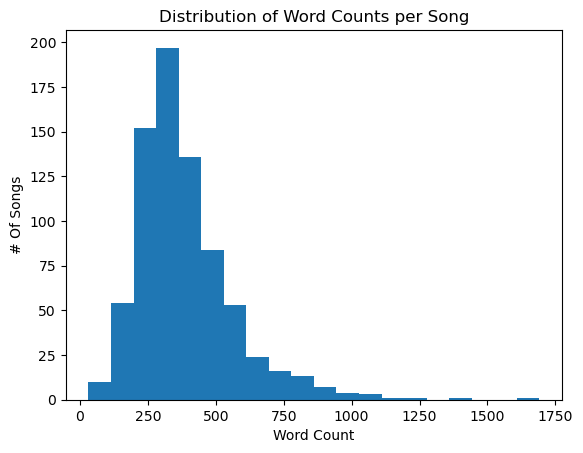

In [12]:
# Histogram of total word counts
plt.figure()
plt.hist(df["word_count"], bins=20)
plt.title("Distribution of Word Counts per Song")
plt.xlabel("Word Count")
plt.ylabel("# Of Songs")
plt.show()

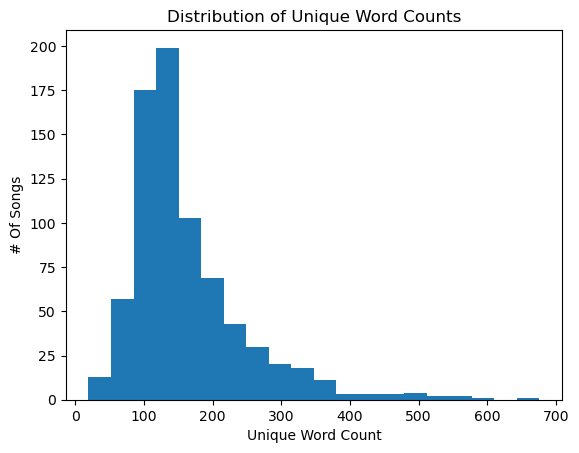

In [13]:
# Histogram of unique word counts
plt.figure()
plt.hist(df["unique_word_count"], bins=20)
plt.title("Distribution of Unique Word Counts")
plt.xlabel("Unique Word Count")
plt.ylabel("# Of Songs")
plt.show()

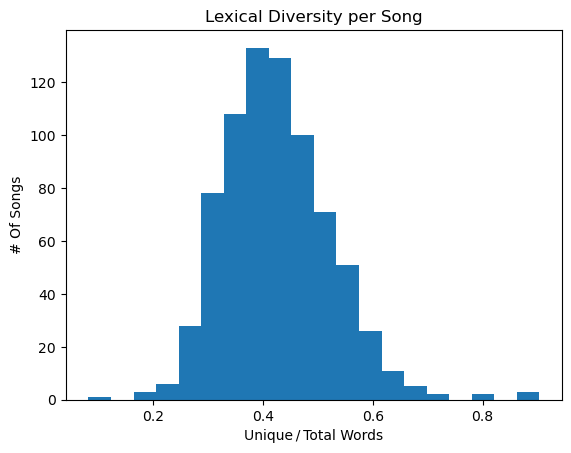

In [14]:
# Histogram of lexical diversity
plt.figure()
plt.hist(df["lexical_diversity"], bins=20)
plt.title("Lexical Diversity per Song")
plt.xlabel("Unique / Total Words")
plt.ylabel("# Of Songs")
plt.show()

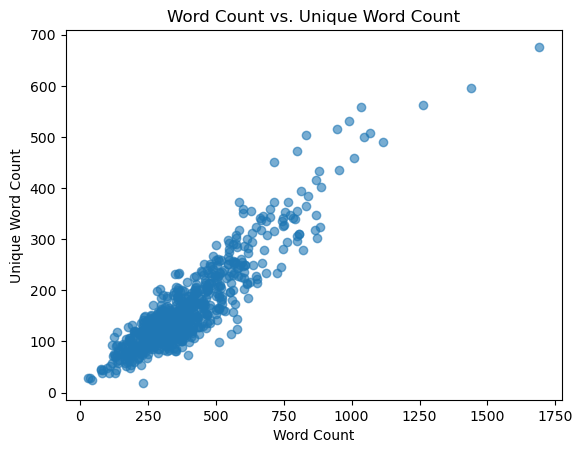

In [15]:
# Scatter: total vs. unique
plt.figure()
plt.scatter(df["word_count"], df["unique_word_count"], alpha=0.6)
plt.title("Word Count vs. Unique Word Count")
plt.xlabel("Word Count")
plt.ylabel("Unique Word Count")
plt.show()

# Summary Table
Aggregate key statistics for reporting.

In [16]:
summary = df[["word_count","unique_word_count","lexical_diversity"]].agg([
    "mean","median","min","max","std"
])
summary.rename(index={
    "mean":"Mean",
    "median":"Median",
    "min":"Min",
    "max":"Max",
    "std":"StdDev"
}, inplace=True)

summary

,word_count,unique_word_count,lexical_diversity
Mean,385.671070,161.906209,0.425050
Median,350.000000,137.000000,0.418719
Min,31.000000,19.000000,0.081897
Max,1691.000000,676.000000,0.903226
StdDev,181.864881,85.831094,0.097573


# Bonus: Word Count vs Peak Position
Explore possible relationships between song lyric length and peak chart performance.

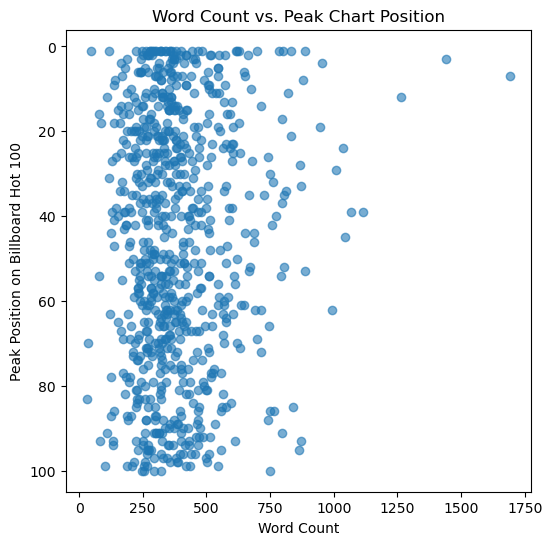

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(df['word_count'], df['peakPos'], alpha=0.6)
plt.gca().invert_yaxis()  # Rank 1 at top
plt.title('Word Count vs. Peak Chart Position')
plt.xlabel('Word Count')
plt.ylabel('Peak Position on Billboard Hot 100')
plt.show()

As you can observe - there is no correlation at all between the word count and the success of a song in the billboard top-100